# [Computational Social Science] Classification Part 1
## Classification Algorithms

In this lab we will cover **Classification** methods. Some of this might look familiar from your previous statistics courses where you fit models on binary or categorical outcomes.

---

## Data

We're going to use our [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) dataset again for this lab. Load the dataset in, and explore it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Create a list of column names, found in "adult.names"
col_names = ['age', 'workclass', 'fnlwgt',
            'education', 'education-num',
            'marital-status', 'occupation', 
             'relationship', 'race', 
             'sex', 'capital-gain',
            'capital-loss', 'hours-per-week',
            'native-country', 'income-bracket']

# Read table from the data folder
census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)

In [3]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Recall that before we try to train machine learning models on a dataset like this, we need to preprocess it. Preprocess the data to get it ready for training machine learning algorithms. Then, create a dataframe, **X**, that contains all of the features, and a series, **y**, that contains the target.

In [4]:
# Target
lb_style = LabelBinarizer()
y = census['income-bracket-binary'] = lb_style.fit_transform(census["income-bracket"])

# Features
X = census.drop(['income-bracket', 'income-bracket-binary'], axis = 1)
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Class Balance

Before we start modeling, let's look at the distribution of the target variable. Visualize the distribution of the target variable ("income-bracket"). What do you notice? What do you think this pattern suggests about how easy or difficult it would be for a machine learning model to make the correct classifications?

C:\Users\Anike\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


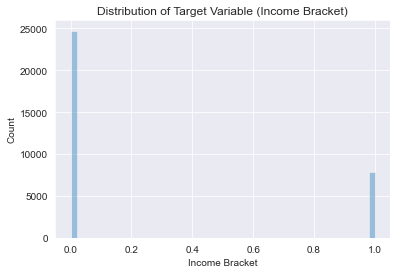

In [5]:
ax = sns.distplot(y, kde = False)
ax.set_title("Distribution of Target Variable (Income Bracket)")
ax.set(xlabel='Income Bracket', ylabel='Count')
plt.show()

**Answer**: The target variable is slightly imbalanced. There are about 25,000 instances of the "<=50k" label, and around 7500 instance of the ">50k" label. This imbalance could be a problem because a machine learning model could optimize accuracy by guessing "0" ("<=50k") more often.

### Data Splitting

Split the data into train, validation, and test sets.

In [9]:
# Set seed
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .25, 
                                                           stratify = y_train)

## Decision Tree Classifier

A [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is a popular classification algorithm. A tree-based classifier learns to map the features to the target by creating a series of if-then-else decision rules.

<img src="https://github.com/dlab-berkeley/Computational-Social-Science-Training-Program/blob/master/images/iris%20tree.png?raw=true" style="width: 500px; height: 275px;" />

Fill in the following code block to create a decision tree model. Then fit it on the training data, and report the accuracy in both the train and validation sets using the "score" method. Check the decision tree classifier documentaiton for help.

In [10]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [8]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-07, random_state=10)

In [9]:
print(dt_classifier.score(X_train, y_train))

1.0


In [10]:
print(dt_classifier.score(X_validate, y_validate))

0.8147792706333973


**Question**: How does your training accuracy compare to your validation accuracy? Why?

**Answer**: Validation accuracy is lower. Machine learning models will tend to overfit their training data, but then generalize less well to new unseen data.

Next, let's look at a unique aspect of tree-based methods: [**feature importances**](https://kdnuggets.com/2020/02/decision-tree-intuition.html). There are a few different ways to calculate a feature importance. One way to do it is to see how much information each new feature adds. If a feature does not add any or very little information to a prediction, it may be possible to safely drop it. Use the following code to put the feature importances and features into a dataframe, then plot the 10 largest feature importances. **Hint**: Consider using the [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) method.

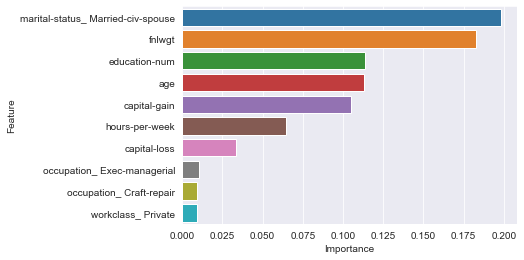

In [11]:
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

**Question**: Which features are the most important? How are these values different from a regression coefficient? How do you think these can be used to explain decisions based on machine learning?

**Answer**: These values are different from regression coefficients in that they are not an expression of statistical significance or causal effect, rather they are an expression of how much they influence an algorithm's prediction. They could be helpful for explaining black box decisions, but also could be unintuitive for people without statistical training.

Next, let's make predictions on the validation set. Then, visualize how your predictions with a confusion matrix. Refer back to the Intro to Machine Learning Lab or the [confusion matrix documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) if you need a reminder.

In [12]:
y_pred = dt_classifier.predict(X_validate)

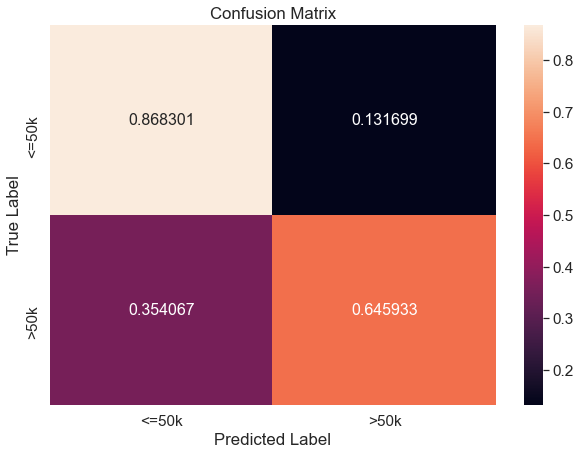

In [13]:
# normalize = true doesn't work for some people
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Logistic Regression

Next, let's look at a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This example should look familiar from the Introduction to Machine Learning lab. Make a logistic regression model, fit it to the training data, and predict on the validation data.

In [14]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_validate)

C:\Users\Anike\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Next, create a dataframe with the features and the logit coefficients (Note: For the logit coefficients you need to use np.transpose or extract the coefficients from the 1d array). Then plot the 10 coefficients with the largest absolute value. Hint: Consider creating a new column with the absolute values for the coefficients, and then using the nlargest before plotting.

In [15]:
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

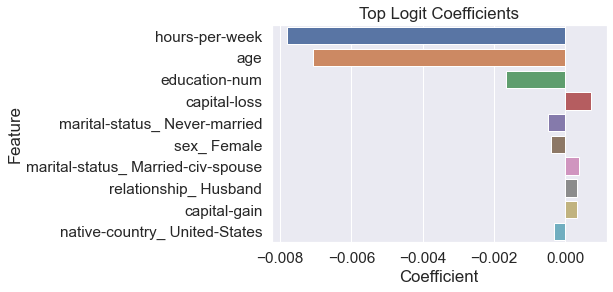

In [16]:
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

**Question**: How do the coefficients compare to the feature importances from the decision tree? Is there overlap? Are they interpretable from a decisionmaker's perspective?

**Answer**: There is some overlap between the largest logit coefficients and the largest features from the decision tree. However, log-odds coefficients may not be interpretable for similar reasons as they are not intuitive for people without statistical training.

Create a confusion matrix to visualize how well you did with your predictions. Are there differences between this confusion matrix and the one you created for the decision tree?

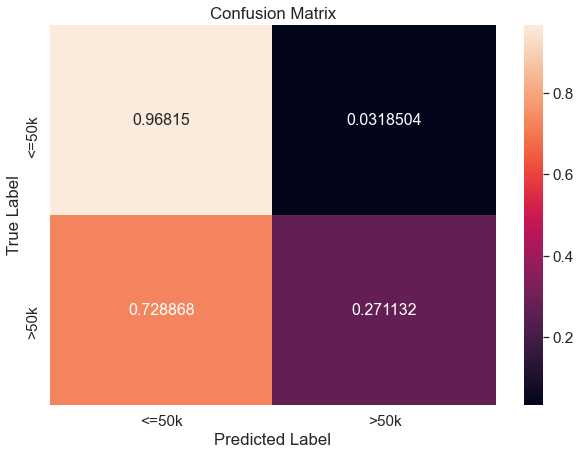

In [17]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Support Vector Machine

The next model we will look at is a [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). SVM is a non-parametric method that looks for the "best separating hyperplane" between two classes.

<img src="https://github.com/dlab-berkeley/Computational-Social-Science-Training-Program/blob/master/images/svm_kernel_machine.png?raw=true" style="width: 500px; height: 275px;" />

Initialize a Support Vector Machine model, fit it on the training data, and predict on the validation data. Visualize the confusion matrix. How does it compare to the other models?

In [18]:
# create a model
svm = SVC()

# fit the model
svm_model = svm.fit(X_train, y_train)

y_pred = svm_model.predict(X_validate)

C:\Users\Anike\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


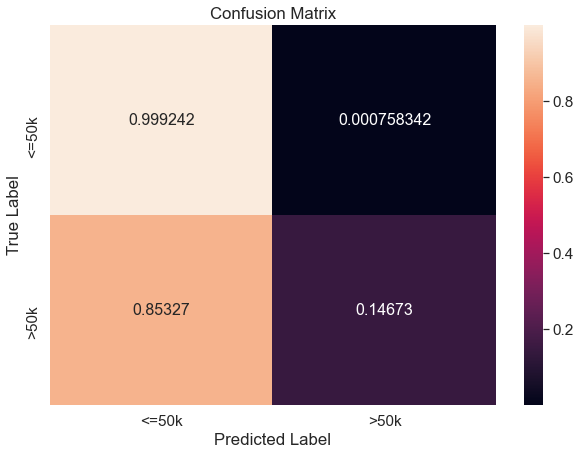

In [19]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning

As with sklearn's regression methods, we can also use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for optimal hyperparameters. Choose one of the classification methods we have used so far and do a grid search to find the best hyperparameter values. **Note**: You might notice that the grid search takes a **very** long time to complete depending on the model and hyperparameters chosen.

In [20]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3, iid=False)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.8512476007677543


## Metrics

In machine learning, accuracy isn't the only metric that we might care about. Accuracy is an expression of ratio of correct observations relative to incorrect observations. This calculation alone does not tell us much about whether we did a good job predicting all of the various categories that we might be concerned about. Consider our census dataset. We saw earlier that the target data is not equally distributed - there were far more people with "<=50k" income. As we saw in our confusion matrices, our algorithms tended to predict observations belonging to the "<=50k" category remarkably well, but tended to do much worse with the ">50k" category. Why do you think this might be the case?

**Answer**: The class imbalance means that an algorithm can tend to do better just by picking the majority class. Accuracy might look good this way, but with a severe enough class imbalance, this score could be misleading.

Let's define a few metrics that will help us move beyond accuracy as our only measure:

$$
True \space Positives = \sum({Predicted \space Positives = Observed \space Positives})
$$

$$
False \space Positives = \sum({Predicted \space Positives \space != Observed \space Positives})
$$

$$
True \space Negatives = \sum({Predicted \space Negatives = Observed \space Negatives})
$$

$$
False \space Negatives = \sum({Predicted \space Negatives \space != Observed \space Negatives})
$$

Imagine we were primarily interested in detecting whether someone is ">50k". We'll call this the "positive" class. A "predicted" observation is the value the model predicted, while the "observed" observation is the value in the ground-truth labels. So a "true positive" in this case would be instances when the model predicted someone to be in the ">50k" category AND they were in the ">50k" category in reality. Similarly, a false positive would be instances where the model predicted someone was in the ">50k" category when they were actually in the "<=50k" category in reality. Use your best model from hyperparameter to predict on the validation set and see how you did on each of these metrics. **Hint**: The confusion matrix is actually a great way to visualize all of these. What does each quadrant of the matrix correspond to in terms of these metrics?

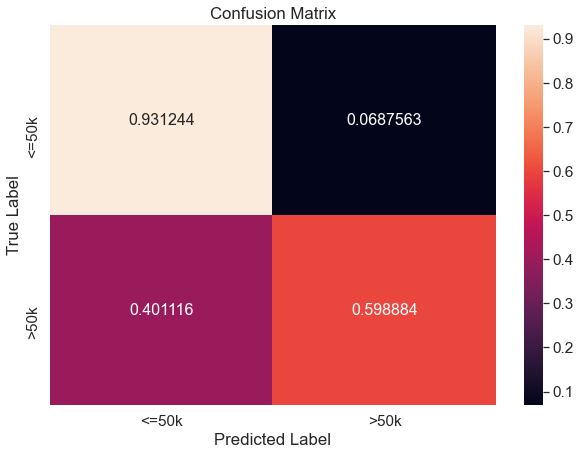

In [21]:
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Answer**: The top left quadrant in this case would be true negatives, top right false positives, bottom left false negatives, bottom right true positives. In this case, we do a really good job with true negatives (.93), but not as well with true positives (.60). Because of the class imbalance there are still a large number of false negatives.

These metrics matter in the social sciences because we usually are not given balanced datasets, and we are oftentimes concerned with predicting rare events. Predicting rare events like fraud, credit defaults, and mortality is difficult. Optimizing on accuracy alone can be misleading if the algorithm just guesses the majority class every time without ever predicting the outcome of interest. Next week we will delve even deeper into these concepts.

---
Authored by Aniket Kesari.